## Time Series Analysis of V75 Trading Data

In [1]:
## These are live data extracted from the MT5 trading Platform
## They are synthetic objects traded for funds
## They also run on 24/7 Timeframe unlike the traditional forex
## Volatility indices with Deriv

In [2]:
### Importing Necessary Lib. for Data Analysis


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.seasonality import autocorrelation_seasonality_test
from sklearn.model_selection import train_test_split
from sktime.forecasting.base import ForecastingHorizon

In [3]:
## This is a personal project - Performing Time Series Analysis on V75 Data

V75 = pd.read_csv(r'C:\Users\IamFavoured\Desktop\IKEBUKWU\Database\V75\V75.csv')

### Time Series Data Exploration

In [4]:
### Lets Go Ahead and explore our datasets

V75.head()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2022.01.01,778582.52,785754.38,747862.31,756372.19,43200,0,13000
1,2022.01.02,756281.55,771178.31,727028.55,737294.42,43200,0,13000
2,2022.01.03,737482.33,756305.13,716855.00,719424.72,43200,0,13000
3,2022.01.04,719187.48,774994.90,718666.96,762897.49,43199,0,13000
4,2022.01.05,762858.47,777166.96,755138.23,759181.02,43198,0,13000


In [5]:
### Checking for null values

V75.isnull().sum()

<DATE>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64

In [6]:
## Checking the basic info such as datatype

V75.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <DATE>     181 non-null    object 
 1   <OPEN>     181 non-null    float64
 2   <HIGH>     181 non-null    float64
 3   <LOW>      181 non-null    float64
 4   <CLOSE>    181 non-null    float64
 5   <TICKVOL>  181 non-null    int64  
 6   <VOL>      181 non-null    int64  
 7   <SPREAD>   181 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 11.4+ KB


In [7]:
V75.isnull().sum()  # No null Value

<DATE>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64

In [8]:
## Firstly lets remove the awkward symbol from our column names

V75.columns =V75.columns.str.replace('[<,>]','',regex=True)
V75.columns=V75.columns.str.title()

In [9]:
## Converting Date column to Datetime format and making it the dataframe index
V75['Date']=pd.to_datetime(V75['Date'])
V75.set_index('Date', inplace=True)
V75.index.freq="D"

In [10]:
V75.head()

,Open,High,Low,Close,Tickvol,Vol,Spread
Date,,,,,,,
2022-01-01,778582.52,785754.38,747862.31,756372.19,43200,0,13000
2022-01-02,756281.55,771178.31,727028.55,737294.42,43200,0,13000
2022-01-03,737482.33,756305.13,716855.00,719424.72,43200,0,13000
2022-01-04,719187.48,774994.90,718666.96,762897.49,43199,0,13000
2022-01-05,762858.47,777166.96,755138.23,759181.02,43198,0,13000


In [11]:
V75.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=181, freq='D')

In [12]:
## Lets split our data into train and test
## I will be limiting my test size(rows) to 5 because:
## The higher the number of train datasets, better accuracy of the model
## The project is intended to predict the prices of the candle stick for the next week, (5 days)
## The higher the number of the test size, the greater the error, because the error of the forecasts keeps propagating along each day

y_train,y_test = temporal_train_test_split(V75, test_size=5)

In [13]:
assert y_train.shape[0] + y_test.shape[0] == V75.shape[0]

In [14]:
### Lets  get our exogenous variable
X=y_train[['Tickvol','Vol','Spread']]
X.head()

,Tickvol,Vol,Spread
Date,,,
2022-01-01,43200,0,13000
2022-01-02,43200,0,13000
2022-01-03,43200,0,13000
2022-01-04,43199,0,13000
2022-01-05,43198,0,13000


In [15]:
y_train.drop(columns=['Tickvol','Vol','Spread'],inplace=True)
y_test.drop(columns=['Tickvol','Vol','Spread'],inplace=True)

In [16]:
y_train

,Open,High,Low,Close
Date,,,,
2022-01-01,778582.52,785754.38,747862.31,756372.19
2022-01-02,756281.55,771178.31,727028.55,737294.42
2022-01-03,737482.33,756305.13,716855.00,719424.72
2022-01-04,719187.48,774994.90,718666.96,762897.49
2022-01-05,762858.47,777166.96,755138.23,759181.02
...,...,...,...,...
2022-06-21,817235.95,821091.83,764420.84,765718.85
2022-06-22,766003.64,776218.69,728797.56,752215.43
2022-06-23,752066.13,752952.29,715731.20,721831.99


In [17]:
y_test

,Open,High,Low,Close
Date,,,,
2022-06-26,657985.23,668108.86,632510.11,642055.41
2022-06-27,642011.48,660647.21,624405.63,658478.13
2022-06-28,658371.52,683929.15,652974.60,681032.63
2022-06-29,681026.46,692248.11,650419.82,657059.55
2022-06-30,657068.19,669833.29,635972.54,650610.08


In [18]:
## Checking if our data is a seasonal data
## It is False, thus a non-seasonal data
## If it was true, we would deploy a K-means time series to group the particular season in
## which a distinctive trend occurs

autocorrelation_seasonality_test(V75.Close,sp=12)

False

### Plotting our Time Series Data

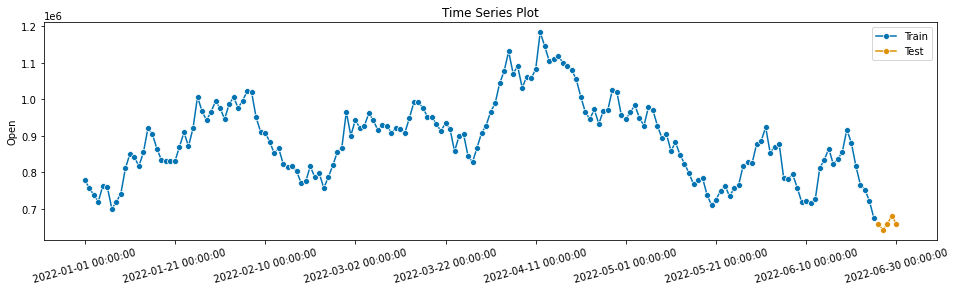

In [19]:
fig,ax=plot_series(y_train.Open,y_test.Open,labels=['Train','Test'])
ax.set(title='Time Series Plot');
plt.xticks(rotation=15);

### Specify our Forecasting Horizon

In [20]:
##Absolute Forecasting Horizon
fha = ForecastingHorizon(y_test.index,is_relative=False,freq="D")
fha

ForecastingHorizon(['2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

In [21]:
## Relative Forecasting Horizon
fhr=fha.to_relative(y_test.index[0])
fhr

ForecastingHorizon([0, 1, 2, 3, 4], dtype='int64', is_relative=True)

In [22]:
# Another way to do it
## This is my best and what i will be using in the function

fh=ForecastingHorizon(pd.date_range(y_test.index[0],periods=5,freq='D'),is_relative=False)
fh

ForecastingHorizon(['2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

### Obtaining Our Forecasting Model

In [23]:
## Since we are dealing with a multivariate forecasting approach
## That entertains exogeneous variabe(X)
## That is trying to predict the outcome of more than one time series data with the aid of another data
## We will need a multivariate model that is best suited for multivariate analysis

In [24]:
## Lets import all the multivariate time series model
from sktime.registry import all_estimators

In [25]:
## Filter the models to know the one that will best suit us

all_estimators(return_tags=['requires-fh-in-fit','X-y-must-have-same-index','ignores-exogeneous-X'],as_dataframe=True,
               filter_tags={"scitype:y":"multivariate","ignores-exogeneous-X":False})

,name,estimator,requires-fh-in-fit,X-y-must-have-same-index,ignores-exogeneous-X
0,DynamicFactor,<class 'sktime.forecasting.dynamic_factor.Dyna...,False,True,False
1,VARMAX,<class 'sktime.forecasting.varmax.VARMAX'>,False,True,False
2,VECM,<class 'sktime.forecasting.vecm.VECM'>,False,True,False


In [26]:
## Now we Know the models best suited for multivariate approach
## Lets go ahead and import them

from sktime.forecasting.dynamic_factor import DynamicFactor
from sktime.forecasting.varmax import VARMAX
from sktime.forecasting.vecm import VECM
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error  ##Time Series Metric

## Using Ensemble Method to get our best Model & Forecast

In [27]:
## We are going to use the multiplexForecaster which is an ensemple type
## MultiplexForecaster for selecting among different models
## MultiplexForecaster facilitates a framework for performing model selection process over different model classes

from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.model_selection import ForecastingGridSearchCV,ExpandingWindowSplitter

In [28]:
forecaster = MultiplexForecaster(forecasters=[("varmax", VARMAX()),("vecm", VECM()),("dynamic_forecaster", DynamicFactor())])

In [29]:
## Similar to cross-validation of sklearn 

cv=ExpandingWindowSplitter(start_with_window=True,step_length=3)

In [30]:
gscv = ForecastingGridSearchCV(cv=cv,param_grid={"selected_forecaster":["varmax", "vecm", "dynamic_forecaster"]},forecaster=forecaster)

In [31]:
gscv.fit(y_train)

C:\Users\IamFavoured\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\IamFavoured\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\IamFavoured\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\IamFavoured\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\IamFavoured\anaconda3\lib\site-packages\statsmodels\base\model.py:6

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(step_length=3),
                        forecaster=MultiplexForecaster(forecasters=[('varmax',
                                                                     VARMAX()),
                                                                    ('vecm',
                                                                     VECM()),
                                                                    ('dynamic_forecaster',
                                                                     DynamicFactor())]),
                        param_grid={'selected_forecaster': ['varmax', 'vecm',
                                                            'dynamic_forecaster']})

In [32]:
## Lets check which forecaster performed best

gscv.best_forecaster_

MultiplexForecaster(forecasters=[('varmax', VARMAX()), ('vecm', VECM()),
                                 ('dynamic_forecaster', DynamicFactor())],
                    selected_forecaster='varmax')

In [33]:
## The best Score the varmax forecaster is 1.9% =2%

gscv.best_score_

0.019637058523212632

In [34]:
## Let us check the errors of other model as well
## Seeming Dynamicforecaster performed worst

gscv.cv_results_

,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
0,0.019637,2.458507,0.016555,{'selected_forecaster': 'varmax'},1.0
1,0.021943,0.029165,0.005977,{'selected_forecaster': 'vecm'},2.0
2,0.063045,0.191201,0.012488,{'selected_forecaster': 'dynamic_forecaster'},3.0


In [35]:
y_pred=gscv.predict(fh)
y_pred

,Open,High,Low,Close
2022-06-26,658110.812022,686444.542847,640319.322654,668343.561228
2022-06-27,668521.149178,696914.261358,651030.442805,680574.091591
2022-06-28,680743.838539,709211.134723,662508.842297,692097.721798
2022-06-29,692258.753186,720677.588576,673487.573134,702961.585812
2022-06-30,703114.538030,731523.189236,683830.333370,713219.966665


In [36]:
y_test

,Open,High,Low,Close
2022-06-26,657985.23,668108.86,632510.11,642055.41
2022-06-27,642011.48,660647.21,624405.63,658478.13
2022-06-28,658371.52,683929.15,652974.60,681032.63
2022-06-29,681026.46,692248.11,650419.82,657059.55
2022-06-30,657068.19,669833.29,635972.54,650610.08


In [37]:
mean_absolute_percentage_error(y_test,y_pred)

0.042582612031081574